In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

In [35]:
df = pd.read_csv('H://Dataset/drug.csv')

In [36]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

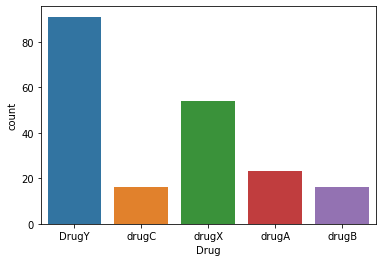

In [7]:
#We have an imbalanced dataset
sns.countplot(data=df, x='Drug')
plt.show()

In [46]:
# Separating each target
df_drugy = df[df['Drug']=='DrugY']
df_drugc = df[df['Drug']=='drugC']
df_drugx = df[df['Drug']=='drugX']
df_druga = df[df['Drug']=='drugA']
df_drugb = df[df['Drug']=='drugB']

In [15]:
# The length of biggest feature
len(df_drugy)

91

In [47]:
# Resampling the minorities
df_c = resample(df_drugc,replace=True,n_samples=91)
df_x = resample(df_drugx,replace=True,n_samples=91)
df_a = resample(df_druga,replace=True,n_samples=91)
df_b = resample(df_drugb,replace=True,n_samples=91)

In [48]:
# putting together all of the separated datas
df = pd.concat([df_drugy,df_c,df_x,df_a,df_b])

In [49]:
#shuffle the final dataframe
df = shuffle(df)

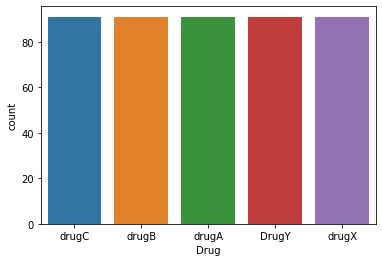

In [50]:
#Data is now balanced
sns.countplot(data=df, x='Drug')
plt.show()

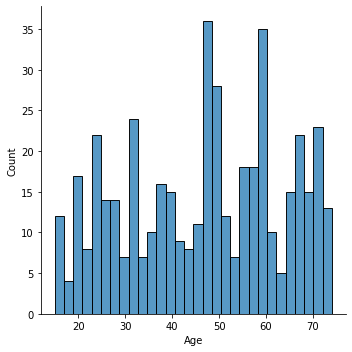

In [24]:
sns.displot(data=df, x='Age',bins=30)
plt.show()

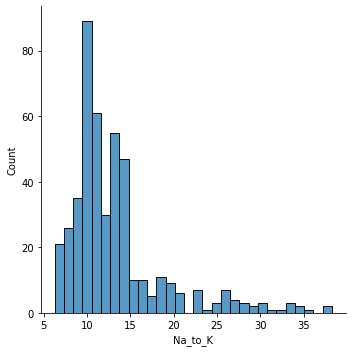

In [25]:
sns.displot(data=df, x='Na_to_K',bins=30)
plt.show()

In [52]:
#separating X and y
X = df.drop('Drug',1)
y = df['Drug']

In [54]:
#Creating dummy variables
X = pd.get_dummies(data=X,drop_first=True)

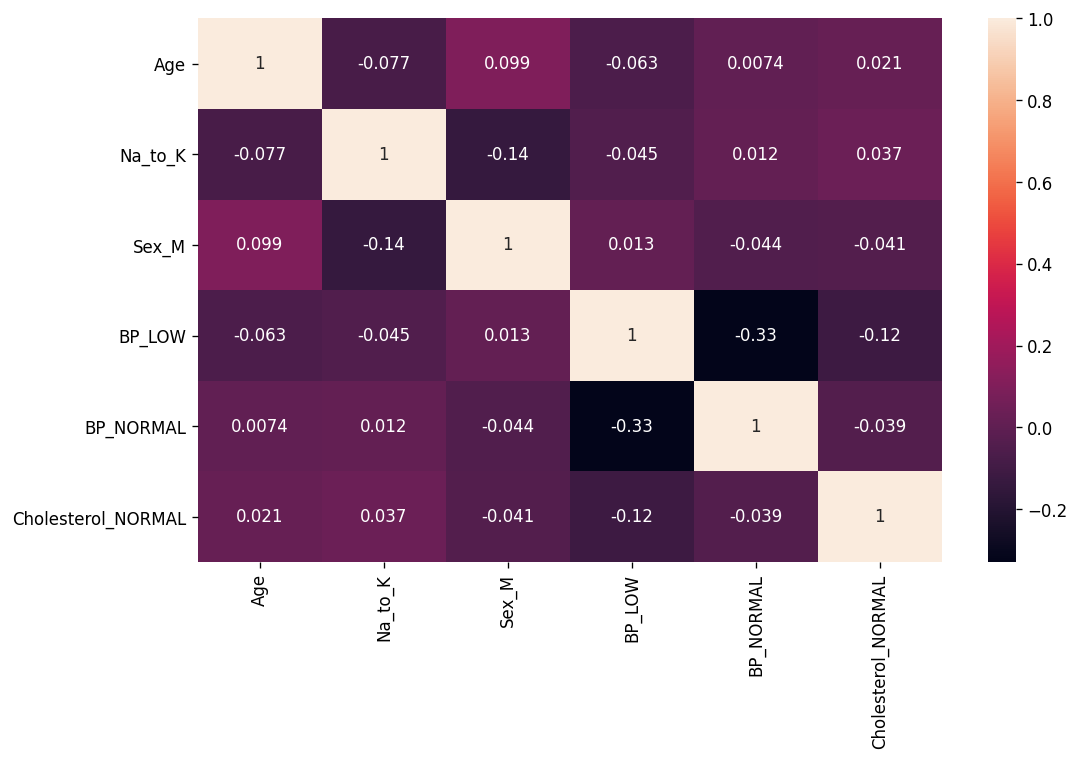

In [55]:
#The correaltion between features
plt.figure(figsize=(10,6),dpi=120)
sns.heatmap(data=X.corr(),annot=True)
plt.show()

In [56]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [57]:
# Creating a holdout test
X_holdout, X_test, y_holdout, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [58]:
#now we scale the data
scaler = StandardScaler()

In [59]:
X_train = scaler.fit_transform(X_train)

In [60]:
X_test = scaler.transform(X_test)

In [61]:
X_holdout = scaler.transform(X_holdout)

In [69]:
def report_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    plot_confusion_matrix(model,X_test,y_test)
    print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       DrugY       1.00      0.83      0.91        36
       drugA       0.97      1.00      0.98        29
       drugB       0.93      1.00      0.96        26
       drugC       0.89      1.00      0.94        17
       drugX       0.97      1.00      0.98        29

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137



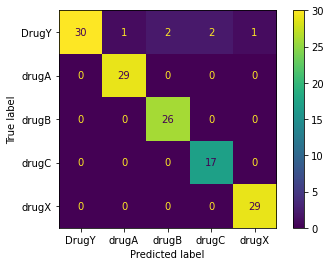

In [181]:
#Logistic Regression
model_lr = LogisticRegression(random_state=42)
report_model(model_lr,X_train,y_train,X_test,y_test)

In [74]:
#Model score on training Data
model_lr.score(X_train,y_train)


0.9811320754716981

In [72]:
# Model score on testing data
model_lr.score(X_test,y_test)

0.9562043795620438

In [95]:
# Tunning the hyper parameters
train_score = []
test_score = []
for c in np.arange(0.01,10,0.3):
    model_lr = LogisticRegression(C=c)
    model_lr.fit(X_train,y_train)
    train_score.append(model_lr.score(X_train,y_train))
    test_score.append(model_lr.score(X_test,y_test))

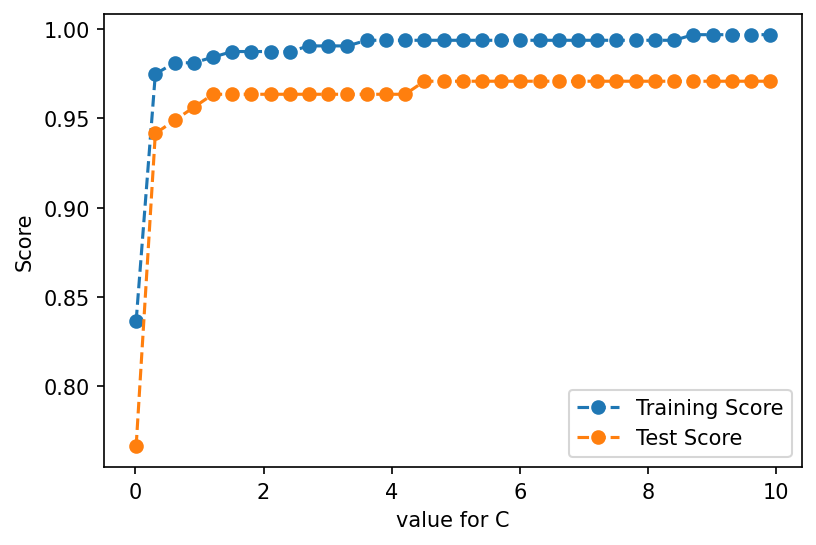

In [97]:
plt.figure(dpi=150)
plt.plot(np.arange(0.01,10,0.3),train_score,'o--',label='Training Score',)
plt.plot(np.arange(0.01,10,0.3),test_score,'o--',label='Test Score')
plt.ylabel('Score')
plt.xlabel('value for C')
plt.legend()
plt.show()

              precision    recall  f1-score   support

       DrugY       1.00      0.86      0.93        36
       drugA       0.97      1.00      0.98        29
       drugB       0.93      1.00      0.96        26
       drugC       0.94      1.00      0.97        17
       drugX       0.97      1.00      0.98        29

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.97       137
weighted avg       0.97      0.96      0.96       137



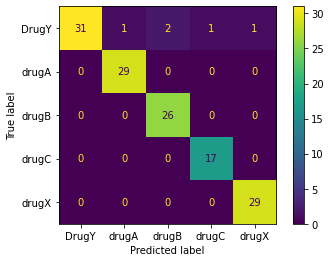

In [87]:
#Finalizing the model with C = 1.2
model_lr = LogisticRegression(C=1.2)
report_model(model_lr,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

       DrugY       1.00      0.36      0.53        36
       drugA       0.91      1.00      0.95        29
       drugB       0.84      1.00      0.91        26
       drugC       0.85      1.00      0.92        17
       drugX       0.71      1.00      0.83        29

    accuracy                           0.83       137
   macro avg       0.86      0.87      0.83       137
weighted avg       0.87      0.83      0.80       137



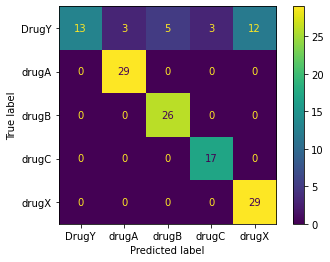

In [89]:
#moving on to KNN
model_knn = KNeighborsClassifier()
report_model(model_knn,X_train,y_train,X_test,y_test)

In [127]:
#KNN is doing as well as Logistic Regression, let's tune the hyper parameters 
train_score = []
test_score = []
for k in range(1,26):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train,y_train)
    train_score.append(model_lr.score(X_train,y_train))
    test_score.append(model_lr.score(X_test,y_test))

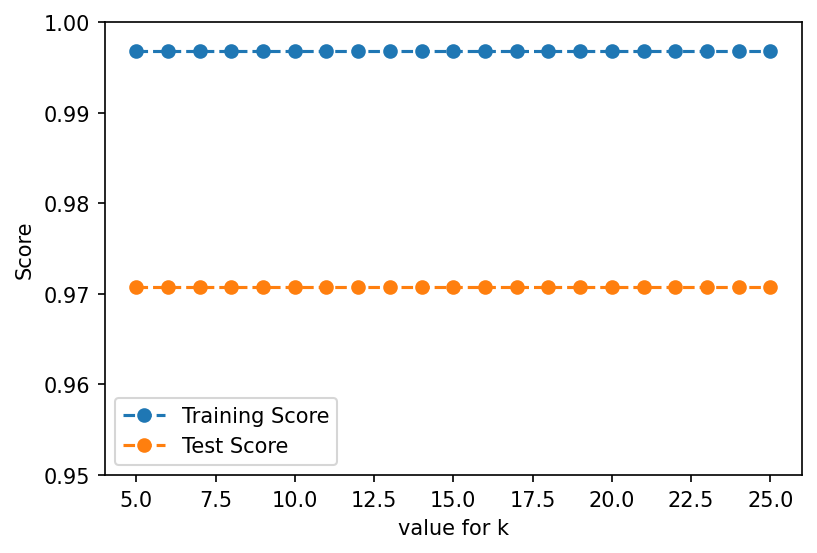

In [105]:
plt.figure(dpi=150)
plt.plot(range(5,26),train_score,'o--',label='Training Score',)
plt.plot(range(5,26),test_score,'o--',label='Test Score')
plt.ylabel('Score')
plt.xlabel('value for k')
plt.ylim(0.95,1)
plt.legend()
plt.show()

              precision    recall  f1-score   support

       DrugY       1.00      0.39      0.56        36
       drugA       0.94      1.00      0.97        29
       drugB       0.84      1.00      0.91        26
       drugC       0.85      1.00      0.92        17
       drugX       0.71      1.00      0.83        29

    accuracy                           0.84       137
   macro avg       0.87      0.88      0.84       137
weighted avg       0.88      0.84      0.81       137



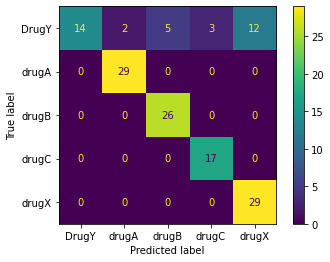

In [106]:
#Not much difference with hyperparameter tunning, let's finalize this 10 neighbours
model_knn = KNeighborsClassifier(n_neighbors=10)
report_model(model_knn,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

       DrugY       1.00      0.72      0.84        36
       drugA       1.00      1.00      1.00        29
       drugB       0.87      1.00      0.93        26
       drugC       0.94      1.00      0.97        17
       drugX       0.85      1.00      0.92        29

    accuracy                           0.93       137
   macro avg       0.93      0.94      0.93       137
weighted avg       0.94      0.93      0.92       137



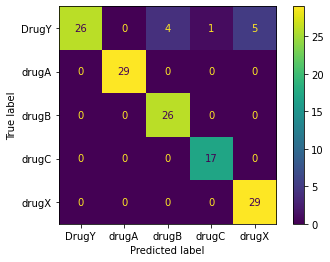

In [182]:
#now we check the performance of support vector classifier 
model_svc = SVC(random_state=42)
report_model(model_svc,X_train,y_train,X_test,y_test)

In [157]:
#Close to logistic regression, let's tune the hyper parameters 
train_score = []
test_score = []
for c in np.arange(0.01,20,0.5):
    model_svc = SVC(C=c)
    model_svc.fit(X_train,y_train)
    train_score.append(model_svc.score(X_train,y_train))
    test_score.append(model_svc.score(X_test,y_test))

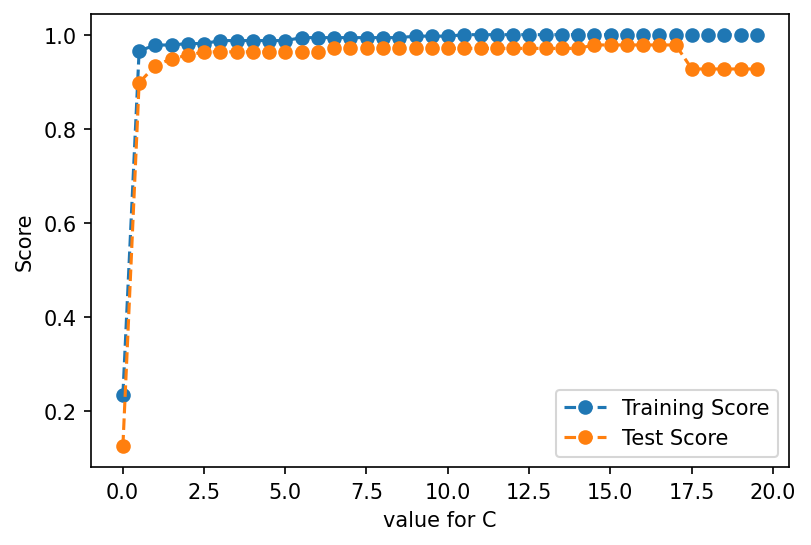

In [159]:
plt.figure(dpi=150)
plt.plot(np.arange(0.01,20,0.5),train_score,'o--',label='Training Score',)
plt.plot(np.arange(0.01,20,0.5),test_score,'o--',label='Test Score')
plt.ylabel('Score')
plt.xlabel('value for C')

plt.legend()
plt.show()

In [183]:
#Let's try different degrees
train_score = []
test_score = []
for d in range(1,5):
    model_svc = SVC(random_state=42,degree=d)
    model_svc.fit(X_train,y_train)
    train_score.append(model_svc.score(X_train,y_train))
    test_score.append(model_svc.score(X_test,y_test))

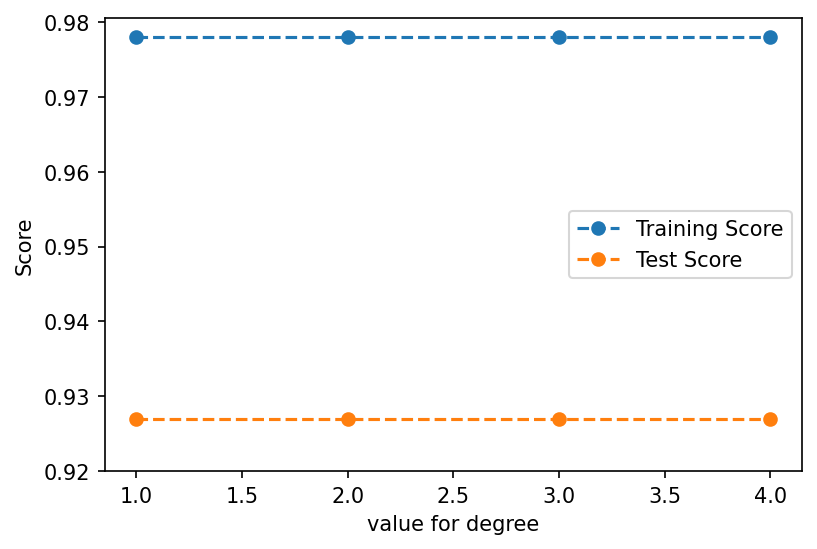

In [184]:
plt.figure(dpi=150)
plt.plot(range(1,5),train_score,'o--',label='Training Score',)
plt.plot(range(1,5),test_score,'o--',label='Test Score')
plt.ylabel('Score')
plt.xlabel('value for degree')
plt.ylim(0.92)
plt.legend()
plt.show()

              precision    recall  f1-score   support

       DrugY       1.00      0.81      0.89        36
       drugA       1.00      1.00      1.00        29
       drugB       0.93      1.00      0.96        26
       drugC       0.94      1.00      0.97        17
       drugX       0.88      1.00      0.94        29

    accuracy                           0.95       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.95      0.95      0.95       137



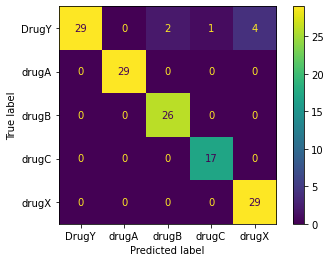

In [185]:
#finalizing the model
model_svc = SVC(C=1.5,random_state=42)
report_model(model_svc,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        36
       drugA       1.00      1.00      1.00        29
       drugB       1.00      1.00      1.00        26
       drugC       1.00      1.00      1.00        17
       drugX       1.00      1.00      1.00        29

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



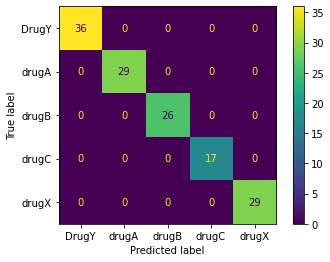

In [186]:
#Now we move on to Decision Tree
model_dtc = DecisionTreeClassifier(random_state=42)
report_model(model_dtc,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        36
       drugA       1.00      1.00      1.00        29
       drugB       1.00      1.00      1.00        26
       drugC       1.00      1.00      1.00        17
       drugX       1.00      1.00      1.00        29

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



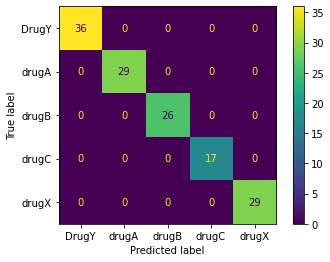

In [187]:
# A perfect fit! let's try the next model
model_rfc = RandomForestClassifier(random_state=42)
report_model(model_rfc,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        36
       drugA       0.00      0.00      0.00        29
       drugB       0.37      1.00      0.54        26
       drugC       0.57      1.00      0.72        17
       drugX       0.00      0.00      0.00        29

    accuracy                           0.58       137
   macro avg       0.39      0.60      0.45       137
weighted avg       0.40      0.58      0.45       137



C:\Users\Pooyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


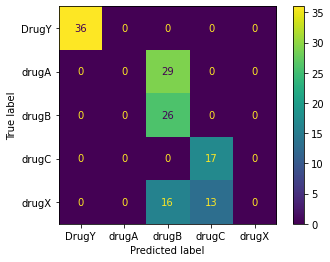

In [188]:
# Same as decision trees, random forest have been perfect, for the last model we try Adaboost
model_abc = AdaBoostClassifier(random_state=42)
report_model(model_abc,X_train,y_train,X_test,y_test)

In [189]:
#Adaboost is doing worse than other models, let's work on the hyperparameters 
# First we focus on learning rate
train_score = []
test_score = []
for n in np.arange(0.01,20,0.5):
    model_abc = AdaBoostClassifier(random_state=42,learning_rate=n)
    model_abc.fit(X_train,y_train)
    train_score.append(model_abc.score(X_train,y_train))
    test_score.append(model_abc.score(X_test,y_test))


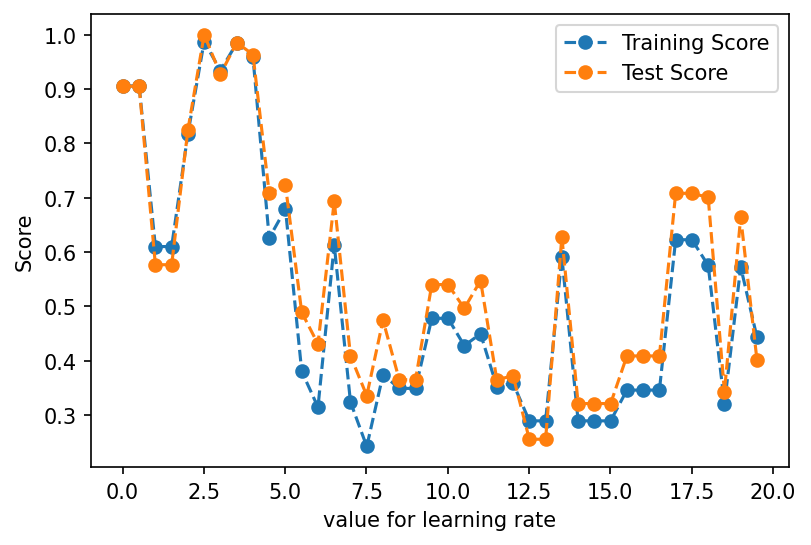

In [190]:
plt.figure(dpi=150)
plt.plot(np.arange(0.01,20,0.5),train_score,'o--',label='Training Score',)
plt.plot(np.arange(0.01,20,0.5),test_score,'o--',label='Test Score')
plt.ylabel('Score')
plt.xlabel('value for learning rate')

plt.legend()
plt.show()

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        36
       drugA       1.00      1.00      1.00        29
       drugB       1.00      1.00      1.00        26
       drugC       1.00      1.00      1.00        17
       drugX       1.00      1.00      1.00        29

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



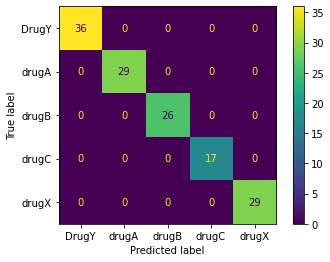

In [191]:
#based on the plot, learning rate 2.5 seems to be the best 
model_abc = AdaBoostClassifier(random_state=42,learning_rate=2.5)
report_model(model_abc,X_train,y_train,X_test,y_test)

In [192]:
# let's try tunning another hyper parameter
train_score = []
test_score = []
for n in range(10,81,5):
    model_abc = AdaBoostClassifier(random_state=42,learning_rate=2.5, n_estimators=n)
    model_abc.fit(X_train,y_train)
    train_score.append(model_abc.score(X_train,y_train))
    test_score.append(model_abc.score(X_test,y_test))


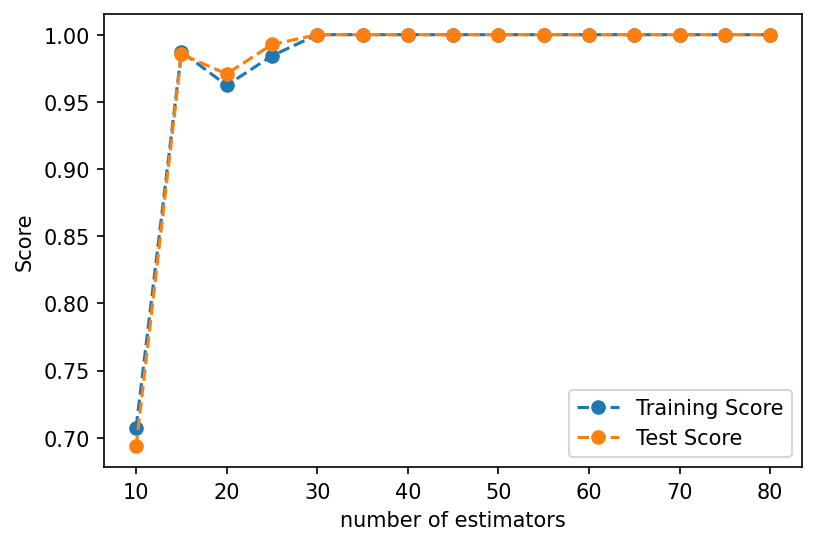

In [180]:
plt.figure(dpi=150)
plt.plot(range(10,81,5),train_score,'o--',label='Training Score',)
plt.plot(range(10,81,5),test_score,'o--',label='Test Score')
plt.ylabel('Score')
plt.xlabel('number of estimators')

plt.legend()
plt.show()

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        55
       drugA       1.00      1.00      1.00        62
       drugB       1.00      1.00      1.00        65
       drugC       1.00      1.00      1.00        74
       drugX       1.00      1.00      1.00        62

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



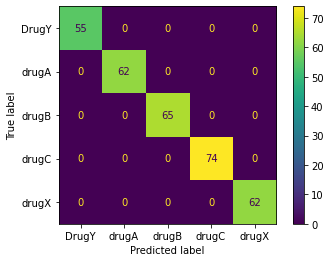

In [193]:
#Based on the results, looks like tree based algorithms are doing the best 
# for the final holdout test I will use random forests and decision tree
final_model = RandomForestClassifier()
report_model(final_model,X_train,y_train,X_holdout,y_holdout)

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        55
       drugA       1.00      1.00      1.00        62
       drugB       1.00      1.00      1.00        65
       drugC       1.00      1.00      1.00        74
       drugX       1.00      1.00      1.00        62

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



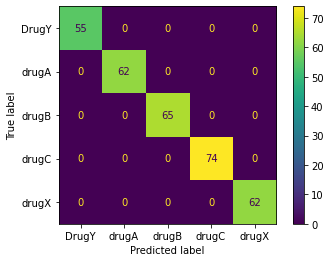

In [198]:
#Decision Tree
final_model_tree = DecisionTreeClassifier()
report_model(final_model_tree,X_train,y_train,X_holdout,y_holdout)